# Lab 6: Machine Learning

## Overview
In the second part of our \*sniff\* *FINAL* \*sniff\* lab, we're going to explore some of the machine learning models that we discussed in Monday's lecture. We'll be playing around a lot with scikit-learn and applying it to real-world dataset. There won't be many new algorithms in this lab that we didn't see in lecture; instead, this will give you the chance to play around with models, feature selection, and hyperparameters to develop a better intuition for how machine learning models behave on interesting data.

If this setup looks similar to what we did in Monday's lecture, that's because it is pretty similar. Monday's lecture covered a lot of ground, and especially if you're less familiar with machine learning in other contexts, the hope is this lab is a friendly environment in which to get a bit more comfortable with how ML works in the real world.

Let's dive in!

## The Dataset
Predicting health insurance charges is an important problem in the United States. In this task, we will predict the health insurance charges to patients as a function of various health data features about the patient.

[The dataset](https://www.kaggle.com/mirichoi0218/insurance) consists of 1338 examples of health insurance charges. The features of each example are (in order) as follows:

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male (1 female, 0 male)
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. (1 northeast, 2 northwest, 3 southeast, 4 southwest)

The final column in the dataset is the cost billed by the health insurance, and is the variable we are trying to predict:
- charges: Individual medical costs billed by health insurance




## Loading the Dataset
Let's first run the following cell to import the required packages and load our dataset:

In [1]:
import numpy as np
import sklearn

def load_dataset_regression(filename):
    """
    Loads the dataset from the file. Shuffles it, then
    adds it to NumPy matrices.

    Input:
    filename - the name of a .csv file to load.

    Output:
    X, Y - NumPy arrays extracted from the .csv file. X is
           the data, Y is the labels.
    """
    # The skiprows=1 argument skips the first row, where the data labels are
    with open(filename, "r") as f:
        dataset = np.loadtxt(f, delimiter=",", skiprows=1)

    # Shuffle the dataset before splitting into train, validation, and test sets - this is
    # important to ensure an even distribution of datapoints in the train, validation,
    # and test sets.
    np.random.shuffle(dataset)

    # X is all columns except the "csMPa" column
    X = dataset[:,:-1]
    # Y is the "csMPa" column
    Y = dataset[:,-1]
    return X, Y

X, Y = load_dataset_regression("insurance.csv")
print(X)
print(Y)

[[37.    0.   36.19  0.    0.    3.  ]
 [55.    1.   26.8   1.    0.    4.  ]
 [57.    1.   29.81  0.    1.    3.  ]
 ...
 [28.    1.   24.32  1.    0.    1.  ]
 [62.    0.   27.55  1.    0.    2.  ]
 [18.    0.   33.33  0.    0.    3.  ]]
[19214.70553 35160.13457 27533.9129  ... 23288.9284  13937.6665
  1135.9407 ]


## Visualizing the Data
Let's get a better intuition for our data by running the following cell, which visualizes our output variable as a function of each of the input variables.

We'll be diving more into plotting when we chat next week about MatPlotLib, but for now we can take this function as a given and use it to visualize our data.

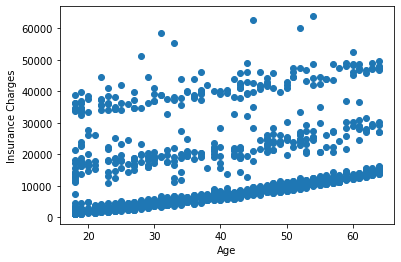

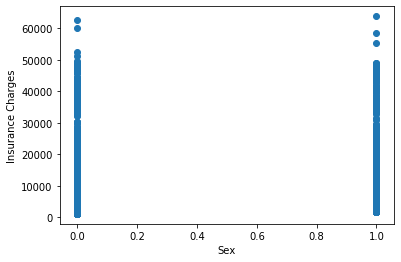

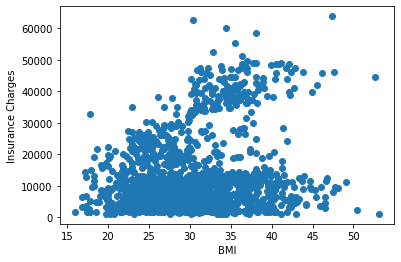

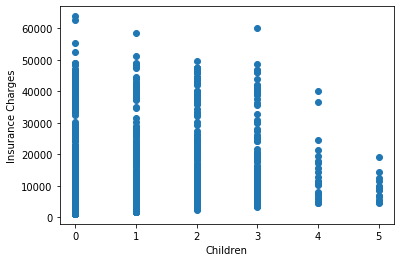

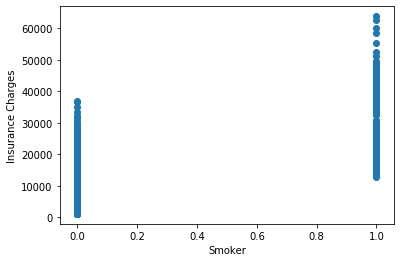

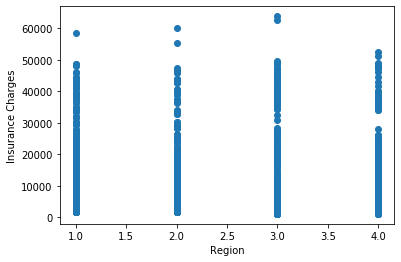

In [5]:
import matplotlib.pyplot as plt

def view_data(X, Y):
    """
    Produces plots of each variable in X with respect to
    the prediction variable of interest, Y.

    Input:
    X, Y - NumPy arrays representing features and labels,
           respectively.
    
    Output:
    None - but visualizes graphs with plt.show()
    """
    feature_labels = ["Age", "Sex", "BMI", "Children", "Smoker", "Region"]
    for col in range(X.shape[1]):
        # Plot each column with respect to Y to look at variable relationship.
        plt.clf()
        plt.scatter(X[:, col], Y)
        plt.xlabel(feature_labels[col])
        plt.ylabel("Insurance Charges")
        plt.show()
        
view_data(X, Y)

## Segmenting Our Data
Start by writing the following function to divide the data up into training, validation, and test sets. Use a split of 80% training set, 10% validation set, 10% validation set.

In [11]:
def split_data(X, Y):
    """
    Given data and labels, divides the data into training,
    validation, and test sets, with an 80%-10%-10% split.
    
    Input:
    X, Y - NumPy arrays consisting of features and labels,
           respectively.

    Output:
    X_train, Y_train, X_valid, Y_valid, X_test, Y_test - NumPy arrays representing the
    """
    raise NotImplementedError

## Implementing Least Squares

To get started, implement a least squares model in the following function. Train the model on your training set, print out the loss, then print out your predictions on the validation set. How well does a linear model perform on the data?

In [13]:
def least_squares_linear_regression(X_train, Y_train, X_valid, Y_valid):
    """
    Run least squares regression on the training set. Then print out predictions
    on the validation set.
    
    Input:
    X_train, Y_train, X_valid, Y_valid - NumPy arrays representing the
                                         training and validation sets.

    Output:
    [ Y_hat_valid Y_valid] - NumPy array, the left column of which consists
                             of predictions on X_valid, the right column of which
                             consists of Y_valid. 
                             
    Prints out the squared loss.
    
    """
    raise NotImplementedError
    
least_squares_linear_regression(X_train, Y_train, X_valid, Y_valid)

NameError: name 'X_train' is not defined

## Implementing Feature Selection (Optional)

Look back at the graphs for this dataset - this dataset is a little bit _messy_. Well, it's not awful, actually, but there's pretty high variance across variables, which makes any sort of linear model a bit of a tricky fit at best.

If you're feeling up to it, choose a feature of the dataset that you feel is better represented by a nonlinear function, and add a new nonlinear column to the dataset. Train least squares linear regression on your newly-augmented dataset, print out the loss, and compare it with the loss from when you implemented least squares with no nonlinearities. How low are you able to get the loss?

(Hint: there really aren't any features that are just screaming at you to pick a certain nonlinear function, like those we saw in the lecture examples. Don't worry! Here are a couple suggestions: consider adding a feature which is the log of the age column, as there's significant density in the bottom left of the graph. Alternatively, choose a feature (any feature!) and find the point at which increasing the degree of a polynomial fit begins to decrease the accuracy. The possibilities here are endless!!)

Note: consider using `np.concatenate` to add a new column onto your existing feature matrices! 🙃


### Example
This was one of the trickiest parts of Monday's lecture, so let's walk through a quick example to cement things if you're feeling a little less sure on this part!

Let's walk quickly through why nonlinearities are such neat features in linear models. Assume for a second that we've got a column, $x$, of the following form:
$
x = \begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n\\
\end{bmatrix}$, and a labels vector, $y$, of the following form: $
y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n\\
\end{bmatrix}$. 


Assume for a moment that $y_i \approx x_i^2$, but this is only a rough approximation. Least squares is a linear model - as we've seen in lecture, it entails fitting a line to the data, such that we predict $y_i = \theta x_i$. How on earth can we possibly hope to fit this data effectively?


It turns out that, if we have an understanding of the function mapping $x$ to $y$, we can add the appropriate features to our feature vector in order to dramatically improve performance. We then construct the following feature vector, $x'$, from our old one, $x$: $x' = \begin{bmatrix}
x_1 & x_1^2\\
x_2 & x_2^2\\
\vdots & \vdots\\
x_n & x_n^2
\end{bmatrix}$. 

Assuming we've got our same $y$, a good model will choose thetas $\theta_1, \theta_2$ such that $\theta_1 x_i + \theta_2 x_i^2 \approx y_i$. Since we know already that $y_i \approx x_i^2$, we can see that a pretty nice approximation is obtained with $\theta_1 = 0, \theta_2 = 1$.

Let's take a quick step back and evaluate what we've just done. We've taken highly, _highly_ nonlinear data, and approximated it with a linear model. _We used a line to model something that isn't a line._ Isn't that incredible?

In [ ]:
def feature_selection_least_squares(X_train, Y_train, X_valid, Y_valid):
    """
    Perform feature selection to construct a new X_train, X_valid using a
    function and feature of your choice. Then run least squares on the new
    X_train, Y_train, and make predictions on the new X_valid and the Y_valid.
    
    Print out the loss from running least squares without feature selection
    (so running it on the old X_train, X_valid), and the loss from running
    least squares with feature selection. Can you select functions which 
    reduce the accuracy below that of a linear model without feature selection?
    
    (If so - super cool!! If not - what might this tell you about the dataset?)
    
    Input:
    X_train, Y_train, X_valid, Y_valid - NumPy arrays representing the
                                         training and validation sets.

    Output:
    None - prints out validation loss with and without feature selection.
    """

## Neural Networks - The Cutting Edge!!

We're finally here... neural networks! Deep learning! The new electricity!

Using scikit-learn's MLPRegressor neural network, try training a neural regressor on the training set. Print out your predictions on the validation set and the validation set labels. How close are your predictions? Play around with the hyperparameters, such as the numbers of nodes, the step size for logistic regression, and the loss, until you're satisfied with how close your predictions are to the real dataset.



In [7]:
from sklearn.neural_network import MLPRegressor

def NN_regressor(X_train, Y_train, X_valid, Y_valid):
    """
    Trains a neural network to perform regression on the dataset. Makes predictions
    on the validation set, and prints out the validation loss from a least squares
    regression versus that of the neural network regression.

    Input:
    X_train, Y_train, X_valid, Y_valid - NumPy arrays representing the
                                         training and validation sets.
    
    Output:
    None - prints out validation loss of NN and least squares regression.
    """
    raise NotImplementedError

def NN_regressor_test(X_train, Y_train, X_test, Y_test):
    """
    When you feel like you're doing a pretty good job on your validation set, try
    training your neural network on the training set, then running your neural 
    network on the test set! Print out yuor predictions and the true test set values.
    How close are your predictions?
    
    Remember that we use the test set once - and only once - to remove experimenter
    bias in the process. In this way, experimentors can't tune their hyperparameters
    to ensure a good fit on the test set, when in reality, their model may fail to
    generalize to new example cases that come in.
    
    Input:
    X_train, Y_train, X_test, Y_test - NumPy arrays representing the
                                       training and test sets.
    
    Output:
    None - prints out test labels and predictions.
    """
    raise NotImplementedError
    
NN_regressor(X_train, Y_train, X_valid, Y_valid)
# Uncomment the next line when you're ready to run the test set!
# NN_regressor_test(X_train, Y_train, X_test, Y_test)

NameError: name 'X_train' is not defined